In [3]:
import matplotlib.pyplot as plt
from sktime.datasets import load_gunpoint
from sktime.transformers.shapelets import ContractedShapeletTransform

train_x, train_y = load_gunpoint(split='TRAIN', return_X_y=True)
test_x, test_y = load_gunpoint(split='TEST', return_X_y=True)

In [2]:
# How long (in minutes) to extract shapelets for.
# This is a simple lower-bound initially; once time is up, no further shapelets will be assessed
time_limit_in_mins = 0.1

# The initial number of shapelet candidates to assess per training series. If all series are visited
# and time remains on the contract then another pass of the data will occur
initial_num_shapelets_per_case = 10

# Whether or not to print on-going information about shapelet extraction. Useful for demo/debugging
verbose = 2

st = ContractedShapeletTransform(
    time_limit_in_mins=time_limit_in_mins,
    num_candidates_to_sample_per_case=initial_num_shapelets_per_case,
    verbose=verbose)
st.fit(train_x, train_y)

visiting series: 15 (#1)
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
visiting series: 39 (#2)
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:01 remaining
Candidate rejected. 00:01 remaining
Candidate finished. 00:01 remaining
Candidate finished. 00:00 remaining
Candidate finished. 00:00 remaining
No more time available! It's been 00:05
Stopping search


Series ID: 15, start_pos: 108, length: 37, info_gain: 0.5896292435785209, 


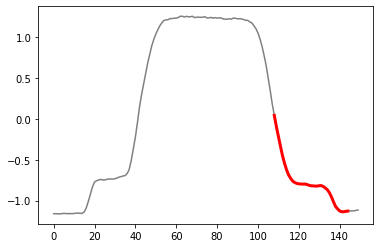

Series ID: 39, start_pos: 0, length: 67, info_gain: 0.26496658316359045, 


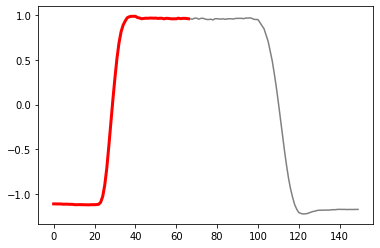

In [4]:
# for each extracted shapelet (in descending order of quality/information gain)
for s in st.shapelets[0:5]:

    # summary info about the shapelet
    print(s)

    # plot the series that the shapelet was extracted from
    plt.plot(
        train_x.iloc[s.series_id,0],
        'gray'
    )

    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()

#0: Series ID: 15, start_pos: 108, length: 37, info_gain: 0.5896292435785209, 
#1: Series ID: 39, start_pos: 0, length: 67, info_gain: 0.26496658316359045, 


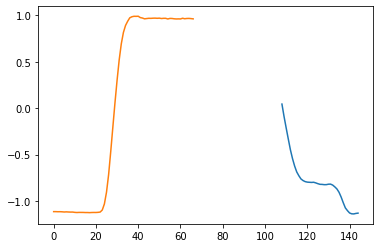

In [5]:
# for each extracted shapelet (in descending order of quality/information gain)
for i in range(0,min(len(st.shapelets),5)):
    s = st.shapelets[i]
    # summary info about the shapelet
    print("#"+str(i)+": "+str(s))

    # overlay shapelets
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length]
    )

plt.show()

In [7]:
import numpy as np
import time
from sktime.datasets import load_gunpoint
from sktime.transformers.shapelets import ContractedShapeletTransform
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline

np.random.seed(seed=0)
train_x, train_y = load_gunpoint(split='TRAIN', return_X_y=True)
test_x, test_y = load_gunpoint(split='TEST', return_X_y=True)

# example pipleine with 1 minute time limit
pipeline = Pipeline([
    ('st', ContractedShapeletTransform(time_limit_in_mins=0.1,
                                       num_candidates_to_sample_per_case=10,
                                       verbose=False)),
    ('rf', RandomForestClassifier(n_estimators=100)),
])

start = time.time()
pipeline.fit(train_x, train_y)
end_build = time.time()
preds = pipeline.predict(test_x)
end_test = time.time()

print("Results:")
print("Correct:")
correct = sum(preds == test_y)
print("\t"+str(correct)+"/"+str(len(test_y)))
print("\t"+str(correct/len(test_y)))
print("\nTiming:")
print("\tTo build:   "+str(end_build-start)+" secs")
print("\tTo predict: "+str(end_test-end_build)+" secs")

Results:
Correct:
	138/150
	0.92

Timing:
	To build:   7.1898353099823 secs
	To predict: 3.1455698013305664 secs
